In [2]:
#pip uninstall matplotlib

In [3]:
#Code and document origins
#http://qingkaikong.blogspot.com/2016/08/clustering-with-dbscan.html
#https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
#USGS https://pubs.er.usgs.gov/publication/ofr96266

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
%matplotlib inline

In [5]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

# load the data set
df = pd.read_csv('input/summer-travel-gps-dbscan.csv', encoding='utf-8')
df.head()

In [6]:
# load the data set
df = pd.read_csv('input/earthquakes.csv', encoding='utf-8')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [24]:
# represent points consistently as (lat, lon)
coords = df.as_matrix(columns=['Latitude', 'Longitude'])

# define epsilon as 15 kilometers to better define clusters, converted to radians for use by haversine
epsilon = 150 / kms_per_radian

C:\Users\EasyE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [51]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric = "haversine").fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 23,412 points down to 116 clusters, for 99.5% compression in 3.83 seconds
Silhouette coefficient: -0.502


In [52]:
df["cluster"] = cluster_labels

In [53]:
df.tail(20)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,cluster
23392,12/18/2016,09:47:05,8.3489,137.6672,Earthquake,12.43,2.9,NaN,6.2,MWW,...,16.00,8.779,8.0,1.0200,US2000828L,US,US,US,Reviewed,50
23393,12/18/2016,11:35:48,-10.1904,161.2187,Earthquake,57.52,5.2,NaN,5.5,MB,...,92.00,1.458,8.8,0.7900,US20008293,US,US,US,Reviewed,1
23394,12/18/2016,13:30:11,-9.9640,-70.9714,Earthquake,622.54,3.1,NaN,6.4,MWW,...,11.00,2.804,9.1,0.6500,US200082AN,US,US,US,Reviewed,23
23395,12/20/2016,04:21:29,-10.1773,161.2236,Earthquake,16.65,2.8,NaN,6.4,MWW,...,21.00,1.456,8.1,0.8900,US200082PP,US,US,US,Reviewed,1
23396,12/20/2016,10:04:39,37.1442,84.9583,Earthquake,10.00,1.7,NaN,5.6,MWW,...,15.00,7.182,7.6,0.8300,US200082S5,US,US,US,Reviewed,-1
23397,12/20/2016,12:33:14,-10.1785,160.9149,Earthquake,10.00,1.6,NaN,6.0,MWW,...,14.00,1.204,5.7,0.8800,US200082TK,US,US,US,Reviewed,1
23398,12/20/2016,20:07:53,-10.1549,160.7816,Earthquake,10.38,3.2,NaN,5.5,MWB,...,19.00,1.087,7.0,0.7000,US10007LIX,US,US,US,Reviewed,1
23399,12/21/2016,00:17:15,-7.5082,127.9206,Earthquake,152.00,1.8,NaN,6.7,MWW,...,17.00,3.380,5.3,1.2000,US10007LKW,US,US,US,Reviewed,1
23400,12/21/2016,16:43:57,21.5036,145.4172,Earthquake,12.05,2.9,NaN,5.9,MWW,...,21.00,6.239,7.6,0.7600,US10007LQE,US,US,US,Reviewed,0
23401,12/24/2016,01:32:16,-5.2453,153.5754,Earthquake,35.00,1.9,NaN,6.0,MWW,...,13.00,1.753,6.9,0.9100,US10007MF5,US,US,US,Reviewed,1


In [54]:
import collections
collections.Counter(cluster_labels)

Counter({0: 3856,
         1: 11105,
         2: 520,
         82: 21,
         3: 298,
         4: 45,
         5: 44,
         6: 119,
         7: 1378,
         8: 17,
         9: 142,
         10: 845,
         11: 211,
         -1: 1492,
         12: 22,
         13: 81,
         14: 23,
         15: 30,
         16: 11,
         17: 85,
         18: 25,
         19: 23,
         28: 125,
         20: 99,
         43: 12,
         21: 128,
         22: 246,
         23: 28,
         24: 33,
         25: 69,
         26: 57,
         31: 24,
         29: 18,
         27: 20,
         30: 45,
         34: 44,
         32: 29,
         33: 47,
         35: 16,
         36: 29,
         90: 19,
         37: 31,
         38: 16,
         39: 27,
         40: 139,
         41: 14,
         42: 16,
         44: 16,
         95: 14,
         45: 16,
         46: 35,
         47: 19,
         48: 16,
         111: 16,
         49: 25,
         50: 16,
         51: 25,
         52: 24,
    

In [58]:
df = df[df.cluster == -1]

In [59]:
df.count

<bound method DataFrame.count of              Date      Time  Latitude  Longitude        Type  Depth  \
82     03/06/1965  11:10:51  -18.4250  -132.9230  Earthquake  10.00   
123    04/16/1965  23:22:21   64.5720  -160.3750  Earthquake  15.00   
136    04/29/1965  15:28:45   47.2880  -122.4060  Earthquake  64.70   
179    06/17/1965  20:14:51   32.0520    87.7840  Earthquake  10.00   
252    09/09/1965  10:02:26    6.4700   -84.4080  Earthquake  15.00   
...           ...       ...       ...        ...         ...    ...   
23321  11/10/2016  12:24:10  -50.0472   114.3817  Earthquake  10.00   
23357  11/28/2016  08:07:22  -41.8291    88.4676  Earthquake  10.00   
23367  12/08/2016  05:15:05   43.8229    86.3451  Earthquake  17.55   
23396  12/20/2016  10:04:39   37.1442    84.9583  Earthquake  10.00   
23405  12/27/2016  23:20:56   45.7192    26.5230  Earthquake  97.00   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
82             NaN                   

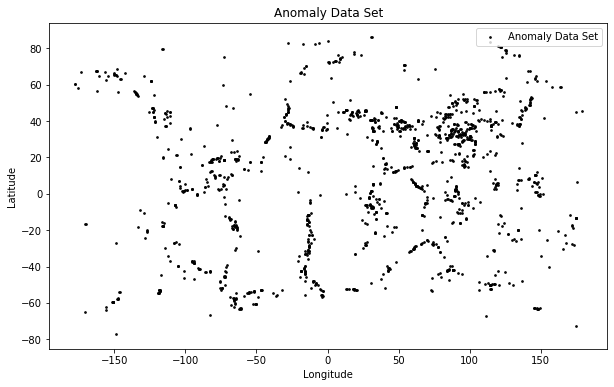

In [62]:
# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Anomaly Data Set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter], ['Anomaly Data Set'], loc='upper right')
plt.show()

In [63]:
df.to_csv('output/earthquakes-dbscan-anomaly-processed.csv', encoding='utf-8')

In [65]:
#C:\Users\EasyE\Anaconda3\Library\share
#conda install -c conda-forge proj4
import os

os.environ['PROJ_LIB'] = r'C:\Users\EasyE\Anaconda3\Library\share'

C:\Users\EasyE\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


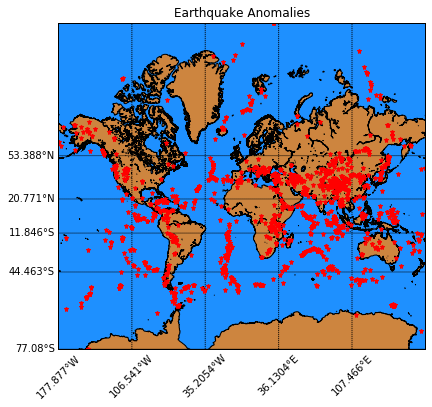

In [67]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

#appended list
lats, lons = [],[]


#44 years of earthquakes
with open('output/earthquakes-dbscan-anomaly-processed.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        #names.append(data['CALL'])
        lats.append(float(data['Latitude']))
        lons.append(float(data['Longitude']))
        #altitude.append(float(data['ELEV']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("Earthquake Anomalies")
plt.savefig('output/earthquake_anomaly_plots.png', format='png', dpi=500)
plt.show()

#Code Example
#https://makersportal.com/blog/2018/7/20/geographic-mapping-from-a-csv-file-using-python-and-basemap